In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


df = pd.read_excel("/content/drive/MyDrive/M&E/DATA SETS/CPIMS DATASETS/RegistrationListReport_03062023.xlsx")


activeovc = df[df['exit_status'] == 'ACTIVE'].drop_duplicates(subset = 'cpims_ovc_id')

# Group by constituency and school level, then count the number of children
activeovc.groupby(['constituency', 'schoollevel'])['cpims_ovc_id'].count().reset_index()





,constituency,schoollevel,cpims_ovc_id
0,Kilifi North,ECDE,559
1,Kilifi North,Not in School,674
2,Kilifi North,Primary,2650
3,Kilifi North,Secondary,277
4,Kilifi North,Tertiary,6
5,Malindi,ECDE,329
6,Malindi,Not in School,389
7,Malindi,Primary,1660
8,Malindi,Secondary,204
9,Malindi,Tertiary,16


In [ ]:
import plotly.express as px
from vega_datasets import data

tips = px.data.tips()

strikes = data.birdstrikes()

px.histogram(strikes, x="Origin_State",
             labels= {"tip":})

SyntaxError: expression expected after dictionary key and ':' (<ipython-input-1-f7554ce462bf>, line 9)

In [ ]:
color = input("What is your favourite color?")
print(color,'is my favourite color too')

What is your favourite color?Red
Red is my favourite color too


In [1]:
# TASK 1: Load and Explore the Dataset

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Handle errors
try:
    # Load Iris dataset
    iris_data = load_iris()
    df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    df['species'] = iris_data.target
    df['species'] = df['species'].apply(lambda x: iris_data.target_names[x])

    # Display first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Check data types and missing values
    print("\n Data types:")
    print(df.dtypes)

    print("\n Missing values:")
    print(df.isnull().sum())

    # Clean the dataset (no missing values, but example for general use)
    df_cleaned = df.dropna()

except FileNotFoundError:
    print("⚠️ File not found.")
except Exception as e:
    print("❌ Error loading dataset:", e)


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

 Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

 Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [2]:
# TASK 2: Basic Data Analysis
# Basic statistics
print("\n Descriptive Statistics:")
print(df_cleaned.describe())

# Grouping: Mean petal length per species
grouped = df_cleaned.groupby("species")["petal length (cm)"].mean()
print("\n Average petal length per species:")
print(grouped)

# Insights
print("\n Insights:")
print("- Setosa has the shortest petals on average.")
print("- Virginica has the longest petal length.")



 Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

 Average petal length per species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

 Insights

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


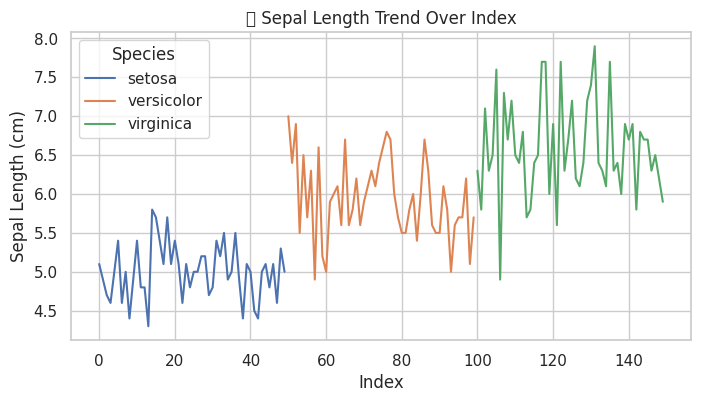

<ipython-input-4-66e93a6daf15>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="pastel")


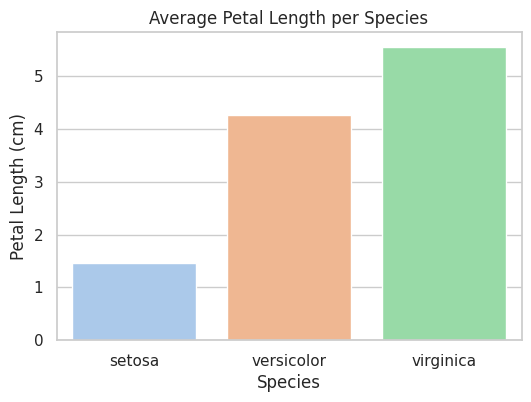

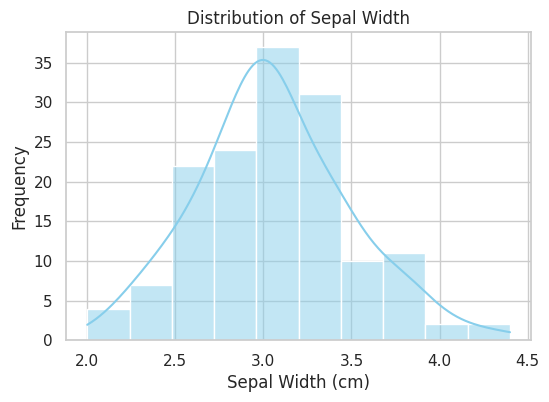

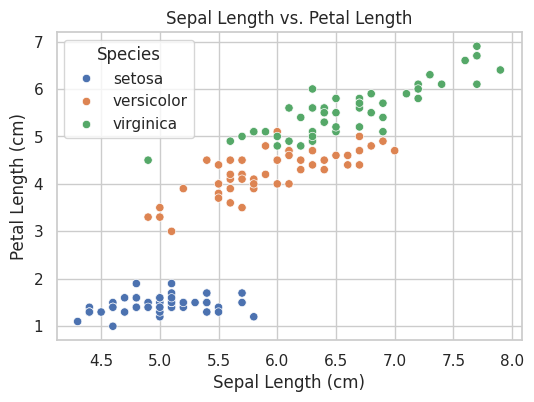

In [4]:
# TASK 3: Data Visualization

# Set Seaborn theme
sns.set(style="whitegrid")

# 1. Line Chart – Just for illustration, simulate a "trend"
plt.figure(figsize=(8, 4))
df_cleaned['index'] = df_cleaned.index
sns.lineplot(data=df_cleaned, x='index', y='sepal length (cm)', hue='species')
plt.title("📈 Sepal Length Trend Over Index")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.legend(title="Species")
plt.show()

# 2. Bar Chart – Average petal length per species
plt.figure(figsize=(6, 4))
sns.barplot(x=grouped.index, y=grouped.values, palette="pastel")
plt.title("Average Petal Length per Species")
plt.ylabel("Petal Length (cm)")
plt.xlabel("Species")
plt.show()

# 3. Histogram – Distribution of sepal width
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned["sepal width (cm)"], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot – Sepal length vs. Petal length
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x="sepal length (cm)", y="petal length (cm)", hue="species", palette="deep")
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
